In [1]:
!pip install pandas networkX numpy matplotlib scipy scikit-learn tqdm

In [29]:
import networkx as nx
import pandas as pd
from tqdm import tqdm

In [30]:
TRAIN_PATH = '/home/malchul/work/recsys/hackaton/data/train.csv'
TEST_PATH = '/home/malchul/work/recsys/hackaton/data/test.csv'

In [3]:
submition = pd.read_csv("/home/malchul/work/recsys/hackaton/data/submission.csv")
submition

,ego_id,u,v,x1
0,8,0,93,0.000000
1,8,0,143,0.000000
2,8,0,151,1.606742
3,8,1,24,0.026496
4,8,5,4,0.159857
...,...,...,...,...
810971,1709396984676,73,23,1.562170
810972,1709396984676,74,68,0.454210
810973,1709396984676,77,28,0.078504
810974,1709396984676,79,38,0.981812


In [87]:
submition.sort_values(by=['ego_id', 'u', 'v'])

,ego_id,u,v,x1
0,8,0,93,0.000000
1,8,0,143,0.000000
2,8,0,151,1.606742
3,8,1,24,0.026496
4,8,5,4,0.159857
...,...,...,...,...
810971,1709396984676,73,23,1.562170
810972,1709396984676,74,68,0.454210
810973,1709396984676,77,28,0.078504
810974,1709396984676,79,38,0.981812


In [3]:
test_df = pd.read_csv(TEST_PATH)
test_df

,ego_id,u,v,t,x1,x2,x3
0,8,20,19,185.7,3.839089e-04,0.0,0.0
1,8,131,125,161.4,4.034464e-01,0.0,0.0
2,8,73,56,127.0,8.554643e-05,0.0,0.0
3,8,0,4,594.5,2.886418e-01,0.0,0.0
4,8,63,73,127.0,4.281692e-07,0.0,0.0
...,...,...,...,...,...,...,...
40548775,1709396984676,89,0,4.8,1.167843e+00,0.0,0.0
40548776,1709396984676,84,87,NaN,1.179100e-06,0.0,0.0
40548777,1709396984676,8,18,83.0,1.175182e+00,0.0,0.0
40548778,1709396984676,33,20,28.3,5.511019e-01,0.0,0.0


In [31]:
train_df = pd.read_csv(TRAIN_PATH)

In [5]:
train_df

,ego_id,u,v,t,x1,x2,x3
0,0,131,84,148.0,5.669200e-07,0.000000,0.0
1,0,135,164,396.7,6.246274e-02,0.000000,0.0
2,0,47,15,NaN,0.000000e+00,0.000000,1.0
3,0,5,4,594.5,4.962974e-02,0.000000,0.0
4,0,176,219,45.5,1.237935e+00,0.000000,0.0
...,...,...,...,...,...,...,...
122280367,1709396984692,3,5,34.6,2.307750e+00,1.098612,0.0
122280368,1709396984692,1,5,53.8,3.729143e+00,3.496508,1.0
122280369,1709396984692,1,7,1.5,4.286984e+00,0.000000,0.0
122280370,1709396984692,5,11,2.0,3.500757e+00,0.000000,0.0


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122280372 entries, 0 to 122280371
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ego_id  int64  
 1   u       int64  
 2   v       int64  
 3   t       float64
 4   x1      float64
 5   x2      float64
 6   x3      float64
dtypes: float64(4), int64(3)
memory usage: 6.4 GB


In [7]:
train_df.describe()

,ego_id,u,v,t,x1,x2,x3
count,1.222804e+08,1.222804e+08,1.222804e+08,1.035632e+08,1.222804e+08,1.222804e+08,1.222804e+08
mean,8.508872e+11,8.766378e+01,9.480200e+01,1.140129e+02,6.909837e-01,1.986819e-01,1.526350e-01
std,4.958312e+11,6.990831e+01,7.397358e+01,1.125724e+02,1.354156e+00,7.843783e-01,3.596353e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,3.000000e+01,3.400000e+01,2.760000e+01,1.057975e-05,0.000000e+00,0.000000e+00
50%,8.504035e+11,7.300000e+01,7.900000e+01,8.110000e+01,7.433163e-02,0.000000e+00,0.000000e+00
75%,1.279900e+12,1.330000e+02,1.430000e+02,1.611000e+02,8.960580e-01,0.000000e+00,0.000000e+00
max,1.709397e+12,2.990000e+02,2.990000e+02,5.945000e+02,4.728715e+01,1.074882e+01,1.000000e+00


In [54]:
train_df.ego_id.unique()

array([            0,            10,            12, ..., 1709396984686,
       1709396984691, 1709396984692])

In [84]:
test_df.describe()

,ego_id,u,v,t,x1,x2,x3
count,4.054878e+07,4.054878e+07,4.054878e+07,3.430106e+07,3.243902e+07,4.054878e+07,4.054878e+07
mean,8.630826e+11,8.760846e+01,9.466772e+01,1.143237e+02,6.974639e-01,2.011065e-01,1.540051e-01
std,4.924068e+11,6.984842e+01,7.386303e+01,1.128908e+02,1.362519e+00,7.896298e-01,3.609536e-01
min,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.466766e+11,3.000000e+01,3.300000e+01,2.770000e+01,1.088933e-05,0.000000e+00,0.000000e+00
50%,8.675834e+11,7.300000e+01,7.900000e+01,8.130000e+01,7.645115e-02,0.000000e+00,0.000000e+00
75%,1.288490e+12,1.330000e+02,1.430000e+02,1.614000e+02,9.071086e-01,0.000000e+00,0.000000e+00
max,1.709397e+12,2.990000e+02,2.990000e+02,5.945000e+02,3.243133e+01,1.044433e+01,1.000000e+00


array([[<Axes: title={'center': 'x1'}>]], dtype=object)

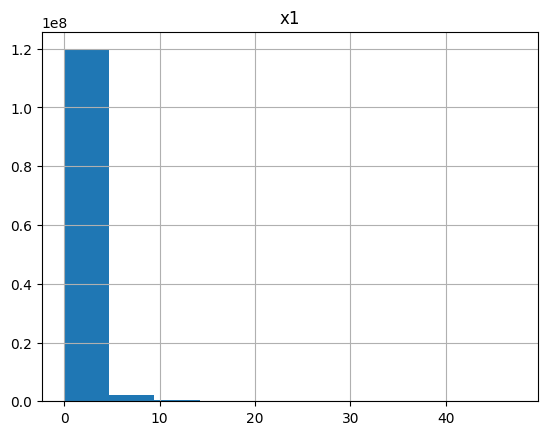

In [37]:
train_df.hist('x1')

# Dataset preparation

In [32]:
ADD_INVERSE_CONNECTION = True
IS_TRAIN = True
df = train_df

OUT_FOLDER = 'updated_train'

In [33]:
import os
from pathlib import Path
os.makedirs(OUT_FOLDER)

In [37]:
unique_ego_ids = sorted(df.ego_id.unique())[7346+10:]

In [38]:
import numpy as np
def tuple2dict(list_of_tuples):
    return {k: v for k,v in list_of_tuples}
from collections import defaultdict
new_feats = defaultdict(dict)

def update_dict(feats, values, key):
    for node, value in values.items():
        feats[node][key] = value

def get_or_value(obj, key, value=np.nan):
    return np.nan if key not in obj else obj[key]

for ego_id in tqdm(unique_ego_ids):
    ego_graph_df = df[df.ego_id == ego_id].copy()
    if ADD_INVERSE_CONNECTION:
        pass
    edge_attr = ['t', 'x2', 'x3']
    if IS_TRAIN:
        edge_attr.append('x1')
    all_nodes = set(ego_graph_df.u.unique()).union(ego_graph_df.v.unique())
    ego_without_zero = ego_graph_df[(ego_graph_df.v != 0 ) & (ego_graph_df.u != 0 )]
    ego_without_zero = ego_without_zero.copy()
    ego_without_zero.fillna(0)
    zero_ego = pd.DataFrame([[ego_id, 0, node_id] for node_id in all_nodes if node_id > 0],
                   columns=['ego_id','u', 'v'])
    truly_ego_graph = pd.concat([zero_ego, ego_without_zero])
    
    friend_graph = nx.from_pandas_edgelist(truly_ego_graph, source='u', target='v').to_undirected()
    no_ego_friend_graph = nx.from_pandas_edgelist(ego_without_zero, source='u', target='v', edge_attr=edge_attr).to_undirected()
    # Add node features
    # Degree
    degree = nx.degree(friend_graph)
    for node, value in degree:
        new_feats[node]['degree'] = value
    # Closeness, Уровень близости ко всем нодам
    update_dict(new_feats, nx.closeness_centrality(no_ego_friend_graph, distance=''), "closeness")
    # Betweeness Кол-во коротких путей, проходящей через ноды
    update_dict(new_feats, nx.betweenness_centrality(no_ego_friend_graph), "betweenness")
    # TSNE
    # Факторизация
    #
    #https://networkx.org/documentation/stable/reference/algorithms/assortativity.html
    # Edge features
    # число общих друзей u и v внутри эго-графа c
    nx.set_node_attributes(friend_graph, new_feats)

    
    # Adamic/Adar
    preds = nx.adamic_adar_index(no_ego_friend_graph)
    adamic = {(u,v): p for u, v, p in preds }
    nx.set_edge_attributes(friend_graph, adamic, "adamic")
    # Edge betweeness
    bb = nx.edge_betweenness_centrality(no_ego_friend_graph, normalized=False)
    nx.set_edge_attributes(friend_graph, bb, "edge_betweenness")
    
    # Graph features
    # плотность эго-графа c
    density = nx.density(friend_graph)

    # # From baseline
    # friendship = np.zeros_like(ego_graph_df["x1"].values)
    # for i, (u, v) in enumerate(zip(ego_graph_df["u"], ego_graph_df["v"])):
    #     u_x1 = ego_graph_df.loc[ego_graph_df["u"] == u, ["v", "x1"]].dropna()
    #     v_x1 = ego_graph_df.loc[ego_graph_df["u"] == v, ["v", "x1"]].dropna()
    #     common_friends = u_x1.merge(v_x1, on="v")
    #     if common_friends.shape[0] > 0:
    #         friendship[i] = np.mean(common_friends.drop("v", axis=1).values)
    # ego_graph_df["closest_friends"] = friendship
    # try:
    #     pass
    #     #print(np.sqrt(np.mean(np.abs(friendship - ego_graph_df["x1"].values))))
    # except:
    #     pass

    # Append this features
    ego_graph_df['density'] = density
    # Node level
    ego_graph_df['u_degree'] = [friend_graph.nodes[u]['degree'] for u in ego_graph_df.u]
    ego_graph_df['v_degree'] = [friend_graph.nodes[v]['degree'] for v in ego_graph_df.v]
    ego_graph_df['u_closeness'] = [get_or_value(friend_graph.nodes[u], 'closeness') for u in ego_graph_df.u]
    ego_graph_df['v_closeness'] = [get_or_value(friend_graph.nodes[v], 'closeness') for v in ego_graph_df.v]
    ego_graph_df['u_betweenness'] = [get_or_value(friend_graph.nodes[u], 'betweenness') for u in ego_graph_df.u]
    ego_graph_df['v_betweenness'] = [get_or_value(friend_graph.nodes[v], 'betweenness') for v in ego_graph_df.v]
    # Edge level
    ego_graph_df['adamic'] = [get_or_value(friend_graph[row.u][row.v], 'adamic', 0) for row in ego_graph_df[['u','v']].itertuples(index=False)]
    ego_graph_df['edge_betweenness'] = [get_or_value(friend_graph[row.u][row.v], 'edge_betweenness') for row in ego_graph_df[['u','v']].itertuples(index=False)]
    
    ego_graph_df.to_csv(Path(OUT_FOLDER) / f'{ego_id}.csv')

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 33630/54430 [7:19:43<4:31:57,  1.27it/s]


KeyboardInterrupt: 

{'degree': 296}

In [271]:
ego_graph_df['adamic'].unique()

array([nan])

In [274]:
#(218, 256): 0.28599966750267436
ego_graph_df

,ego_id,u,v,t,x1,x2,x3,density,u_degree,v_degree,u_closeness,v_closeness,u_betweenness,v_betweenness,adamic,edge_betweenness
0,8,20,19,185.7,3.839089e-04,0.000000,0.0,0.044772,16,8,0.267252,0.251969,0.012963,0.001993,NaN,9.316718
1,8,131,125,161.4,4.034464e-01,0.000000,0.0,0.044772,6,7,0.265511,0.265511,0.007113,0.015031,NaN,16.929584
2,8,73,56,127.0,8.554643e-05,0.000000,0.0,0.044772,16,15,0.291114,0.267691,0.015842,0.001735,NaN,10.226317
3,8,0,4,594.5,2.886418e-01,0.000000,0.0,0.044772,187,13,NaN,0.253143,NaN,0.000969,NaN,NaN
4,8,63,73,127.0,4.281692e-07,0.000000,0.0,0.044772,12,16,0.271254,0.291114,0.003307,0.015842,NaN,9.592924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,8,132,17,24.1,1.826740e+00,1.791759,0.0,0.044772,5,33,0.259592,0.326048,0.000009,0.270974,NaN,90.609615
1014,8,29,14,346.9,NaN,0.000000,0.0,0.044772,7,16,0.229288,0.257542,0.000147,0.003205,NaN,18.155240
1015,8,56,59,80.0,NaN,0.000000,0.0,0.044772,15,14,0.267691,0.270355,0.001735,0.002481,NaN,5.689995
1016,8,14,11,300.1,NaN,0.000000,0.0,0.044772,16,14,0.257542,0.256731,0.003205,0.001072,NaN,1.533333


131
135
47
5
176
0
226
177
229
251
169
100
131
259
5
112
232
0
194
110
0
0
122
224
36
200
258
55
2
188
145
15
84
233
64
0
54
182
100
0
280
198
134
189
0
147
15
5
285
257
168
0
105
215
34
198
105
166
28
253
260
93
45
244
171
97
220
145
181
233
0
239
0
90
220
0
42
23
0
153
123
111
199
5
68
236
76
188
256
60
0
242
234
16
20
20
235
153
242
57
119
9
100
180
155
243
100
67
56
211
110
180
0
151
241
0
0
0
147
198
249
219
143
185
61
268
195
229
0
188
122
142
159
236
176
234
37
5
244
0
177
171
251
226
192
239
0
33
0
22
0
236
236
240
44
251
162
5
180
59
0
206
103
25
20
265
100
219
226
220
257
127
232
14
127
240
221
189
189
0
0
189
229
0
25
173
241
120
256
149
255
5
36
0
150
54
71
43
230
195
222
0
172
51
39
180
28
252
43
128
245
64
0
23
220
272
10
0
233
96
155
150
162
223
79
147
236
138
101
150
217
233
219
122
220
241
78
252
19
151
207
0
39
181
241
0
76
143
179
240
184
229
236
194
219
204
205
76
127
58
199
63
34
173
219
214
111
274
193
162
0
189
212
171
172
147
124
52
113
68
275
182
150
57
207
250

In [ ]:
friend_graph.nodes[93]

In [170]:
print(friend_graph[292][297]['x1']), print(friend_graph[297][292]['x1']) 

2.83363844368642e-10
2.83363844368642e-10


(None, None)

In [166]:
ego_graph_df[ego_graph_df.u == 297]

,ego_id,u,v,t,x1,x2,x3
947,0,297,292,126.5,2.833638e-10,0.0,0.0


In [167]:
ego_graph_df[ego_graph_df.u == 292]

,ego_id,u,v,t,x1,x2,x3
446,0,292,297,126.5,0.0,0.0,0.0


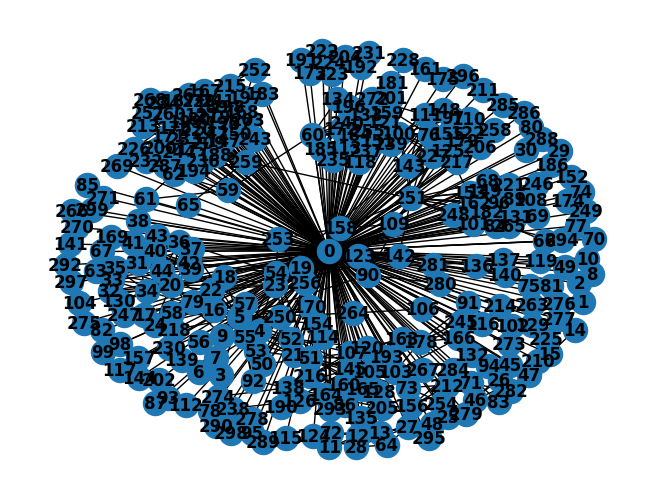

In [180]:
nx.draw(friend_graph, with_labels=True, font_weight='bold')

In [ ]:

#1. Нода 0 не связана со всеми вершинами. Это не эго граф. Возможно связи пропущены. Давай добавим эти связи
#2. Заполним связи нулями
#
#3. Задачу поставим так: Есть две ноды. у каждой ноды посчитаны статистики, статистики у возможной связи (AA/CF). 
# плюс к ноде добавлены фичи из attr
# Для случайной связи у нас уже есть все фичи, исключая x1
# Возможно часть данных пропущена. Чтобы не тренить большие графовые сетки.
# 4. Построим граф, дополнив эго граф связями с нулевым айдишником. Сделаем его ненаправленным
# 5. Мы считаем фичи для графа. плотность.
# 6. Мы считаем индивидуальные фичи у каждой ноды. 
# 7. Мы считаем фичи у каждой возможной связи. Есть у и в. 
# TODO Посмотреть плотность графа у школьников потом
# 8. Конкатим новые фичи к уже существующим. У связи (u,v) будут фичи ранее определенные + графа + фичи каждой ноды отдельно (в порядке u,v) + фичи связей
# 9. Для известных пар u,v мы убираем x1. Тренируем дерево градиентного бустинга, потому что часть фичей отсутствует.


NameError: name 'largest_hub' is not defined

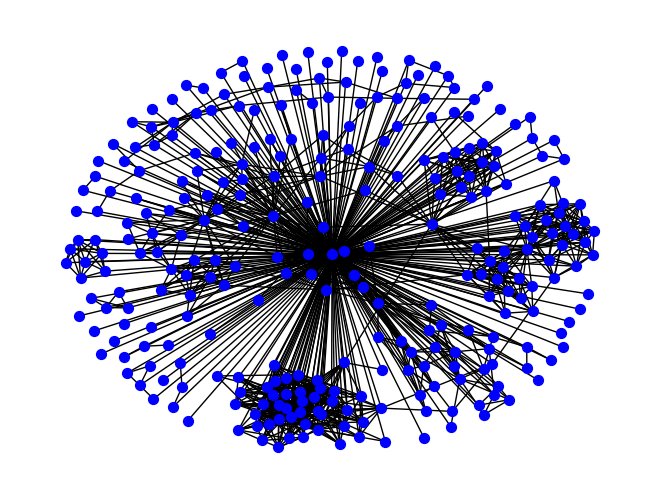

In [181]:
# Draw graph
hub_ego = friend_graph
pos = nx.spring_layout(hub_ego, seed=42)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

In [149]:
attr = pd.read_csv("/home/malchul/Downloads/Telegram Desktop/attr.csv")
attr

,ego_id,u,age,city_id,sex,school,university
0,0,227,68,-1,1,778293348,-1
1,0,45,38,237065842,1,82803468,238500268
2,0,142,60,237065842,1,196560139,-1
3,0,280,66,-1,2,963209731,720783270
4,0,41,18,-1,2,308862409,-1
...,...,...,...,...,...,...,...
14930743,1709396984692,2,16,492149712,2,769209871,-1
14930744,1709396984692,12,15,-1,1,-1,-1
14930745,1709396984692,18,23,-1,1,-1,-1
14930746,1709396984692,4,16,650683235,1,-1,-1


In [152]:
len(attr[attr.ego_id==0].u.unique()), attr[attr.ego_id==0].u.max()

(286, 299)

In [146]:
len(attr['ego_id'].unique())

82382

In [147]:
train_df.ego_id.nunique() + test_df.ego_id.nunique()

82382